# Analysis

1.The closer a city is to the equator the higher the temperature of the city is and viceversa.
2.The humidity in a city does not have a strong correlation with the temperature or latitude. Cities across the entire latitude range have similar humidity levels.
3.The highest wind speeds appeared farthest away from the equator, and those cities approximately 20 degrees North or South of the equator had the lowest humidity percentages.

In [17]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
from citipy import citipy
from config_giorgia import api_key

# Generate Cities List

In [18]:
#creating a dataframe that contains all the longitude and latitude randomly generated
random_cities = pd.DataFrame()
random_cities['rand_latitude'] = [np.random.uniform(-90,90) for x in range(1500)]
random_cities['rand_longitude'] = [np.random.uniform(-180, 180) for x in range(1500)]
random_cities.head()

,rand_latitude,rand_longitude
0,54.362177,175.953214
1,-1.119275,179.584693
2,21.358618,104.827118
3,68.058017,139.018628
4,-68.427836,117.110229


In [19]:
#adding to the data frame created the closest city and country related to the randomly generate coordinates
random_cities['Closest City'] = ""
random_cities['Country Code'] = ""

for index, row in random_cities.iterrows():
    lat = row['rand_latitude']
    lng = row['rand_longitude']
    random_cities.set_value(index, 'Closest City', citipy.nearest_city(lat, lng).city_name)
    random_cities.set_value(index, 'Country Code', citipy.nearest_city(lat, lng).country_code)

random_cities.head()

,rand_latitude,rand_longitude,Closest City,Country Code
0,54.362177,175.953214,beringovskiy,ru
1,-1.119275,179.584693,rungata,ki
2,21.358618,104.827118,yen bai,vn
3,68.058017,139.018628,deputatskiy,ru
4,-68.427836,117.110229,albany,au


In [20]:
#deleting duplicate cities in order to get the final unique city count
random_cities = random_cities.drop_duplicates(['Closest City', 'Country Code'])
random_cities = random_cities.dropna()
random_cities.reset_index(inplace=True)
print(len(random_cities['Closest City'].value_counts()))

611


In [21]:
#creating a new dataframe in order to keep only the city name and the country
cities = random_cities[['Closest City', 'Country Code']]

#rename columnds for later merging
cities = cities.rename(columns = {'Closest City': 'City'})
cities.head()
len(cities)

615

In [22]:
#adding the following columns to the dataframe that I will download via the openweathermap API
cities['Latitude'] = ""
cities['Longitude'] = ""
cities['Temperature (F)'] = ""
cities['Humidity (%)'] = ""
cities['Cloudiness (%)'] = ""
cities['Wind Speed (mph)'] = ""

cities.head()

,City,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,beringovskiy,ru,,,,,,
1,rungata,ki,,,,,,
2,yen bai,vn,,,,,,
3,deputatskiy,ru,,,,,,
4,albany,au,,,,,,


# Perform API calls

In [23]:
#start accessing the data
print("Begin API Call to OpenWeather Database ")
print("---------------------------------")

#determining the base url to use
base_url ='http://api.openweathermap.org/data/2.5/weather?'

searchcount = 0

for index, row in cities.iterrows():
    # Building target url
    query_url = base_url + 'appid=' + api_key + '&q=' + (row['City']) + '&units=' + (row['Country Code']) + '.json?'
    #url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], 
                                                                                              #row['Country Code'], api_key)
   
    # Printing to ensure loop is correct
    searchcount += 1
    print("Processing record " + str(searchcount) + ' for the city: ' + row['City'])
    print("     Record found for city: " + row['City'])
    #print("Now retrieving City #" + str(index) + ": " + row['City'] + ", " + row['Country Code'])
    #print(query_url)
    
    # Running request
    weather_data = req.get(query_url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
    
print("---------------------------------")
print("Processing Complete")
print("---------------------------------")

#changing the strings of the following columns into floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities[column] = pd.to_numeric(cities[column], errors='coerce')
    
#dropping all the n/a values
cities.dropna(inplace=True)

cities.head()

Begin API Call to OpenWeather Database 
---------------------------------
Processing record 1 for the city: beringovskiy
     Record found for city: beringovskiy
Processing record 2 for the city: rungata
     Record found for city: rungata
Error with city data. Skipping
Processing record 3 for the city: yen bai
     Record found for city: yen bai
Processing record 4 for the city: deputatskiy
     Record found for city: deputatskiy
Processing record 5 for the city: albany
     Record found for city: albany
Processing record 6 for the city: stoyba
     Record found for city: stoyba
Error with city data. Skipping
Processing record 7 for the city: ribeira grande
     Record found for city: ribeira grande
Processing record 8 for the city: morondava
     Record found for city: morondava
Processing record 9 for the city: butaritari
     Record found for city: butaritari
Processing record 10 for the city: le mars
     Record found for city: le mars
Processing record 11 for the city: sorvag
   

Processing record 95 for the city: mucuri
     Record found for city: mucuri
Processing record 96 for the city: southampton
     Record found for city: southampton
Processing record 97 for the city: jacqueville
     Record found for city: jacqueville
Processing record 98 for the city: teluknaga
     Record found for city: teluknaga
Processing record 99 for the city: karaul
     Record found for city: karaul
Error with city data. Skipping
Processing record 100 for the city: saldanha
     Record found for city: saldanha
Processing record 101 for the city: illoqqortoormiut
     Record found for city: illoqqortoormiut
Error with city data. Skipping
Processing record 102 for the city: chernyshevskiy
     Record found for city: chernyshevskiy
Processing record 103 for the city: chuy
     Record found for city: chuy
Processing record 104 for the city: vaitupu
     Record found for city: vaitupu
Error with city data. Skipping
Processing record 105 for the city: chumikan
     Record found for c

Processing record 191 for the city: ussel
     Record found for city: ussel
Processing record 192 for the city: kutum
     Record found for city: kutum
Processing record 193 for the city: strone
     Record found for city: strone
Processing record 194 for the city: port elizabeth
     Record found for city: port elizabeth
Processing record 195 for the city: chokurdakh
     Record found for city: chokurdakh
Processing record 196 for the city: kango
     Record found for city: kango
Processing record 197 for the city: pringsewu
     Record found for city: pringsewu
Processing record 198 for the city: ulladulla
     Record found for city: ulladulla
Processing record 199 for the city: dingle
     Record found for city: dingle
Processing record 200 for the city: gannan
     Record found for city: gannan
Processing record 201 for the city: ukholovo
     Record found for city: ukholovo
Processing record 202 for the city: grindavik
     Record found for city: grindavik
Processing record 203 fo

Processing record 286 for the city: la maddalena
     Record found for city: la maddalena
Processing record 287 for the city: kahului
     Record found for city: kahului
Processing record 288 for the city: ayagoz
     Record found for city: ayagoz
Processing record 289 for the city: dongfeng
     Record found for city: dongfeng
Processing record 290 for the city: karratha
     Record found for city: karratha
Processing record 291 for the city: torbay
     Record found for city: torbay
Processing record 292 for the city: yefimovskiy
     Record found for city: yefimovskiy
Error with city data. Skipping
Processing record 293 for the city: acapulco
     Record found for city: acapulco
Processing record 294 for the city: kieta
     Record found for city: kieta
Processing record 295 for the city: mocuba
     Record found for city: mocuba
Processing record 296 for the city: armacao dos buzios
     Record found for city: armacao dos buzios
Error with city data. Skipping
Processing record 297 

Processing record 382 for the city: zhicheng
     Record found for city: zhicheng
Processing record 383 for the city: ilulissat
     Record found for city: ilulissat
Processing record 384 for the city: fort nelson
     Record found for city: fort nelson
Processing record 385 for the city: marawi
     Record found for city: marawi
Processing record 386 for the city: arklow
     Record found for city: arklow
Processing record 387 for the city: grand gaube
     Record found for city: grand gaube
Processing record 388 for the city: paragominas
     Record found for city: paragominas
Processing record 389 for the city: souillac
     Record found for city: souillac
Processing record 390 for the city: clarksburg
     Record found for city: clarksburg
Processing record 391 for the city: poya
     Record found for city: poya
Processing record 392 for the city: baruun-urt
     Record found for city: baruun-urt
Processing record 393 for the city: richards bay
     Record found for city: richards 

Processing record 479 for the city: svatove
     Record found for city: svatove
Processing record 480 for the city: anantnag
     Record found for city: anantnag
Processing record 481 for the city: basoko
     Record found for city: basoko
Processing record 482 for the city: itoman
     Record found for city: itoman
Processing record 483 for the city: solovetskiy
     Record found for city: solovetskiy
Error with city data. Skipping
Processing record 484 for the city: inhambane
     Record found for city: inhambane
Processing record 485 for the city: kimberley
     Record found for city: kimberley
Processing record 486 for the city: sistranda
     Record found for city: sistranda
Processing record 487 for the city: celestun
     Record found for city: celestun
Processing record 488 for the city: klyuchi
     Record found for city: klyuchi
Processing record 489 for the city: haibowan
     Record found for city: haibowan
Error with city data. Skipping
Processing record 490 for the city: 

Processing record 575 for the city: acarau
     Record found for city: acarau
Error with city data. Skipping
Processing record 576 for the city: husavik
     Record found for city: husavik
Processing record 577 for the city: zhetybay
     Record found for city: zhetybay
Error with city data. Skipping
Processing record 578 for the city: port hedland
     Record found for city: port hedland
Processing record 579 for the city: mentok
     Record found for city: mentok
Error with city data. Skipping
Processing record 580 for the city: yarmouth
     Record found for city: yarmouth
Processing record 581 for the city: chitral
     Record found for city: chitral
Processing record 582 for the city: kushmurun
     Record found for city: kushmurun
Error with city data. Skipping
Processing record 583 for the city: dudinka
     Record found for city: dudinka
Processing record 584 for the city: waitati
     Record found for city: waitati
Processing record 585 for the city: latung
     Record found f

,City,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,beringovskiy,ru,63.05,179.32,254.474,100.0,0.0,7.77
2,yen bai,vn,21.70,104.87,292.024,100.0,100.0,1.32
3,deputatskiy,ru,69.30,139.9,239.174,44.0,48.0,1.27
4,albany,au,42.65,-73.75,273.940,62.0,90.0,4.10
6,ribeira grande,pt,38.52,-28.7,287.150,62.0,40.0,5.70


In [24]:
#exporting the dataframe
cities.to_csv("Cities_Weather_Info.csv")

In [25]:
#check cities dataframe to ensure the count of rows is accurate
print(cities.dtypes)

City                 object
Country Code         object
Latitude            float64
Longitude            object
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object


# Latitude vs Temperature Plot

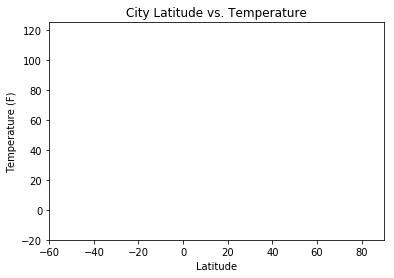

In [30]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Temperature (F)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

#saving the plot
plt.savefig("Latitude_Vs_Temperature_Plot.png")
plt.show()

# Latitude vs Humidity Plot

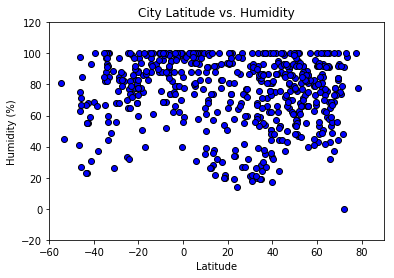

In [31]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Humidity (%)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,120)

#saving the plot
plt.savefig("Latitude_Vs_Humidity_Plot.png")
plt.show()

# Latitude vs. Cloudiness Plot

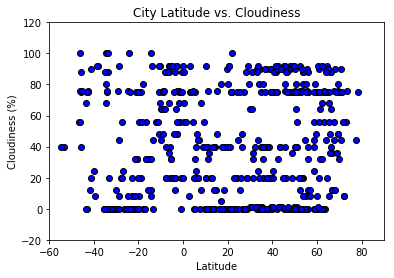

In [32]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Cloudiness (%)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)

#saving the plot
plt.savefig("Latitude_Vs_Cloudiness_Plot.png")
plt.show()

# Latitude vs. Wind Speed Plot

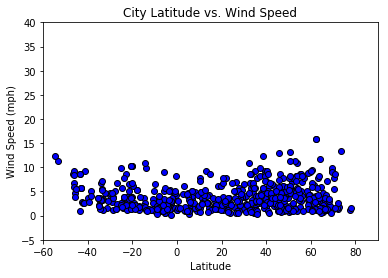

In [33]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Wind Speed (mph)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

#saving the plot
plt.savefig("Latitude_Vs_WindSpeed_Plot.png")
plt.show()